# Comparison of the performances for the different models

Trained models: random forest, perceptron, SVR

## Loading necessary libraries...

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn

## Loading results

In [3]:
methods = ["RFScaled", "RRandomForest_", "SVMScaled", "RSVM_", "PerceptronScaled", "DNN_patient_", "GNN_patient_", "GNN_patient_", "glmgraph", "glmgraph_CT", 
           "glmgraph_random", "glmgraph_complete", "GNN_network_", "GNN_ct_net_", "GNN_random_net_", 
           "GNN_complete_net_"]
dates = ["2023-11-09", "2023-11-09", "2023-11-09","2023-11-09", "2023-11-09", "scaled_2023-11-09", "scaled_2023-11-09", "scaled_randomGraph_2023-11-09", "2023-11-09", 
         "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09"]
all_scores = {}
metnames = ["RF", "RF(R)", "SVM", "SVM(R)", "Perceptron", "DNN_patient", "GNN_patient", "GNN_patient_random", "glmgraph", "glmgraph_CT", "glmgraph_random", 
            "glmgraph_complete","GNN", "GNN_CT","GNN_random", "GNN_complete"]
for ind in range(len(methods)):
    file = "../../results/Simulated/" + methods[ind] + "Scores_P10_" + dates[ind] + ".obj"
    file = open(file, "rb")
    desc_met = metnames[ind]
    all_scores[desc_met] = pickle.load(file)

## Computing means and standard deviations

### Means

In [4]:
scorelist = ["fit_time", "score_time", "test_mean_squared_error", "test_r2", "test_explained_variance",
             "train_mean_squared_error", "train_r2", "train_explained_variance"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = pd.DataFrame(all_scores[metnames[i]][scorelist[j]]).mean()
        
# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)
# print dataframe.
all_means

fit_time  score_time  test_mean_squared_error   test_r2  \
RF                  1.239878    0.346715                 1.500849 -0.698958   
RF(R)               0.227900    0.010800                 0.803804  0.181819   
SVM                 0.001224    0.003293                 0.857719  0.091847   
SVM(R)              0.008400    0.001700                 0.857690  0.091879   
Perceptron          0.251266    0.003334                 1.233647 -0.301969   
DNN_patient         6.342345    0.182599                 0.991470 -0.032133   
GNN_patient         2.766770    0.293741                 1.196247 -0.216037   
GNN_patient_random  1.895382    0.228612                 1.115013 -0.193034   
glmgraph            0.405300    0.001200                 0.695078  0.305065   
glmgraph_CT         0.382000    0.001000                 0.689569  0.300707   
glmgraph_random     0.377100    0.001000                 0.693664  0.311165   
glmgraph_complete   0.351400    0.000900                 0.690682  0.314083   
GNN                 2.455650    0.032655                 0.725931  0.263087   
GNN_CT              2.362105    0.034063                 0.884514  0.108812   
GNN_random          2.251601    0.031630                 0.888275  0.089345   
GNN_complete        2.491614    0.032995                 1.033085 -0.066548   

                    test_explained_variance  train_mean_squared_error  \
RF                                -0.617405              3.900333e-29   
RF(R)                              0.241982              1.977920e-09   
SVM                                0.155389              2.631776e-01   
SVM(R)                             0.155412              2.632962e-01   
Perceptron                        -0.216881              2.465498e-03   
DNN_patient                        0.032294              5.951895e-01   
GNN_patient                       -0.129099              9.932557e-01   
GNN_patient_random                -0.050645              1.114477e+00   
glmgraph                           0.370673              6.124339e-01   
glmgraph_CT                        0.363292              6.201920e-01   
glmgraph_random                    0.374089              6.214948e-01   
glmgraph_complete                  0.375448              6.179441e-01   
GNN                                0.314071              4.581095e-01   
GNN_CT                             0.168103              4.503984e-01   
GNN_random                         0.181585              4.484044e-01   
GNN_complete                       0.021252              5.902450e-01   

                    train_r2  train_explained_variance  
RF                  1.000000                  1.000000  
RF(R)               1.000000                  1.000000  
SVM                 0.734585                  0.737846  
SVM(R)              0.734465                  0.737726  
Perceptron          0.997506                  0.997506  
DNN_patient         0.399578                  0.400814  
GNN_patient        -0.012556                  0.023643  
GNN_patient_random -0.127593                 -0.067110  
glmgraph            0.381636                  0.382126  
glmgraph_CT         0.373617                  0.374107  
glmgraph_random     0.372919                  0.373409  
glmgraph_complete   0.376551                  0.377041  
GNN                 0.538429                  0.538456  
GNN_CT              0.546326                  0.546333  
GNN_random          0.548135                  0.548156  
GNN_complete        0.405664                  0.405708

### Standard deviations

In [5]:
all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = pd.DataFrame(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)
# print dataframe.
all_std

fit_time    score_time  test_mean_squared_error   test_r2  \
RF                  0.018167  1.087561e-02                 0.601208  0.591696   
RF(R)               0.010959  6.324555e-04                 0.447765  0.206515   
SVM                 0.000078  4.755326e-05                 0.396459  0.247276   
SVM(R)              0.001265  4.830459e-04                 0.396448  0.247243   
Perceptron          0.009641  2.138127e-04                 0.694090  0.452287   
DNN_patient         1.091360  1.363554e-02                 0.594701  0.311356   
GNN_patient         2.234384  1.956021e-01                 0.676840  0.344484   
GNN_patient_random  0.663255  1.221438e-02                 0.525703  0.268108   
glmgraph            0.024226  4.216370e-04                 0.395534  0.167324   
glmgraph_CT         0.016310  3.367593e-16                 0.381393  0.184108   
glmgraph_random     0.009620  3.142197e-16                 0.399485  0.162901   
glmgraph_complete   0.014041  3.162278e-04                 0.402422  0.167818   
GNN                 0.684339  2.045173e-03                 0.424406  0.160844   
GNN_CT              0.603270  1.973304e-03                 0.478035  0.162826   
GNN_random          0.664755  1.179146e-03                 0.457049  0.170028   
GNN_complete        0.679067  1.607301e-03                 0.529123  0.283332   

                    test_explained_variance  train_mean_squared_error  \
RF                                 0.556921              2.525159e-30   
RF(R)                              0.190391              3.208067e-09   
SVM                                0.205500              2.960136e-02   
SVM(R)                             0.205472              2.960755e-02   
Perceptron                         0.398335              3.042802e-04   
DNN_patient                        0.325468              9.008906e-02   
GNN_patient                        0.228320              2.829217e-01   
GNN_patient_random                 0.168720              1.631679e-01   
glmgraph                           0.184838              4.909683e-02   
glmgraph_CT                        0.184958              4.438047e-02   
glmgraph_random                    0.188116              5.943564e-02   
glmgraph_complete                  0.184639              5.819947e-02   
GNN                                0.158443              7.446254e-02   
GNN_CT                             0.180856              8.813782e-02   
GNN_random                         0.194731              9.389121e-02   
GNN_complete                       0.300665              1.037275e-01   

                        train_r2  train_explained_variance  
RF                  0.000000e+00              0.000000e+00  
RF(R)               3.123912e-09              3.123863e-09  
SVM                 2.161674e-02              2.131546e-02  
SVM(R)              2.161990e-02              2.131859e-02  
Perceptron          3.107636e-04              3.107485e-04  
DNN_patient         7.855810e-02              7.846562e-02  
GNN_patient         3.097548e-01              2.801520e-01  
GNN_patient_random  1.696835e-01              1.466865e-01  
glmgraph            3.225744e-02              3.186361e-02  
glmgraph_CT         2.808853e-02              2.784221e-02  
glmgraph_random     3.994429e-02              3.959448e-02  
glmgraph_complete   3.773142e-02              3.746174e-02  
GNN                 6.140536e-02              6.139624e-02  
GNN_CT              8.058300e-02              8.057894e-02  
GNN_random          8.953665e-02              8.952015e-02  
GNN_complete        8.812127e-02              8.809772e-02

## Plotting results

### Averaged results

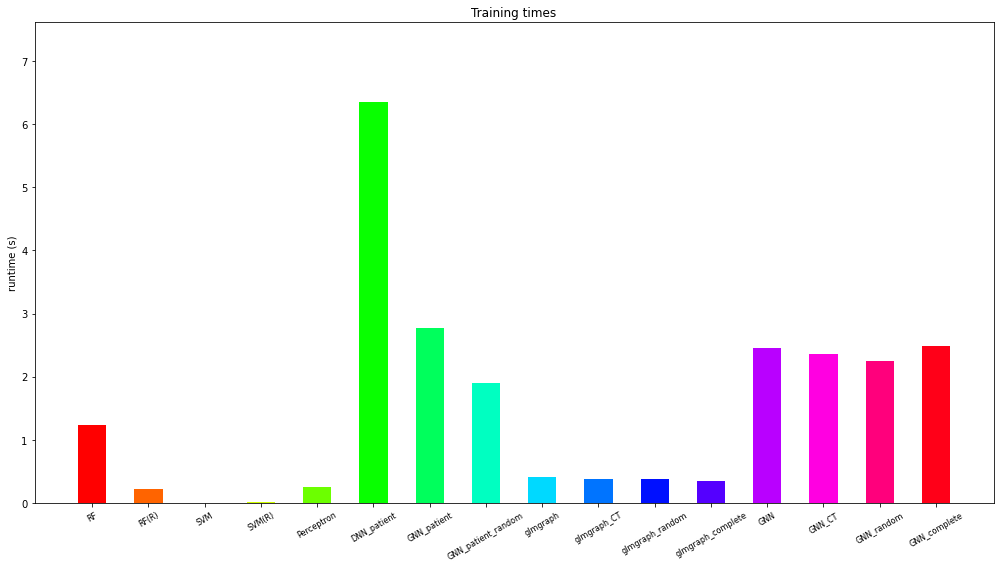

In [6]:
train_time = all_means["fit_time"]
my_cmap = plt.get_cmap("hsv")

def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * height,
            "%.4f" % height,
            ha="center",
            va="bottom",
        )
        plt.setp(plt.xticks()[1], rotation=30)

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

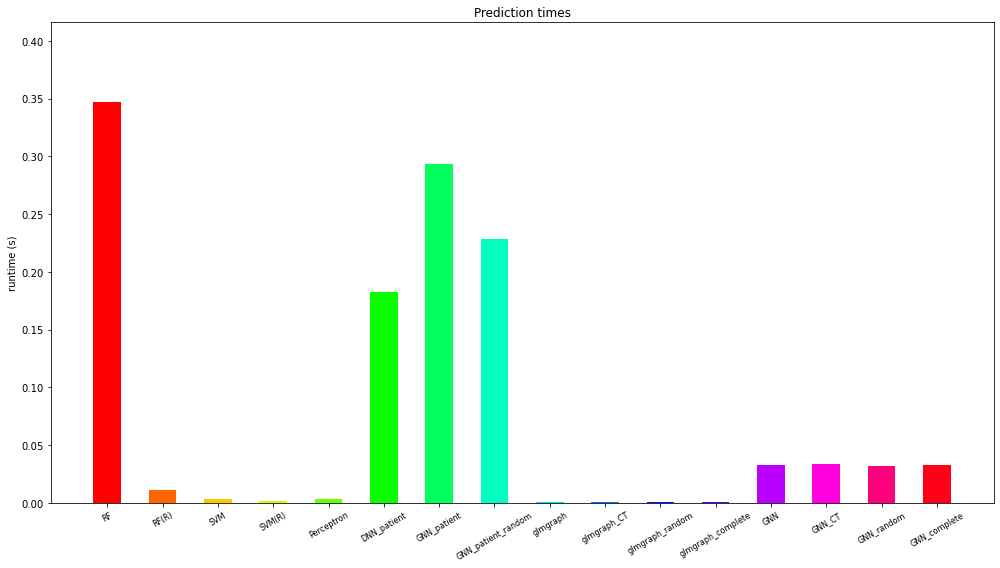

In [7]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

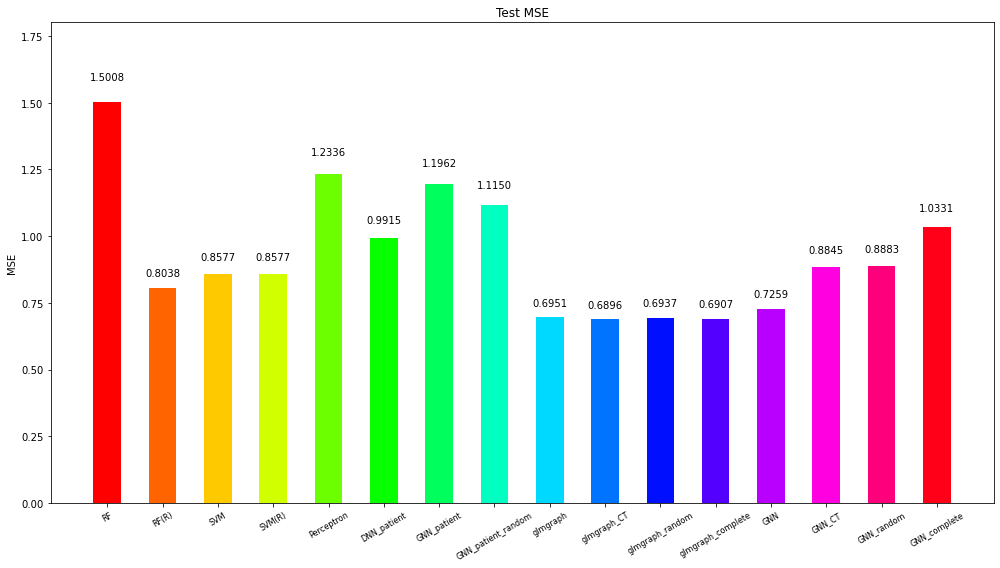

In [8]:
accuracy = all_means["test_mean_squared_error"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("MSE")
ax.set_title("Test MSE")
autolabel(rectangles)
plt.tight_layout()
plt.show()

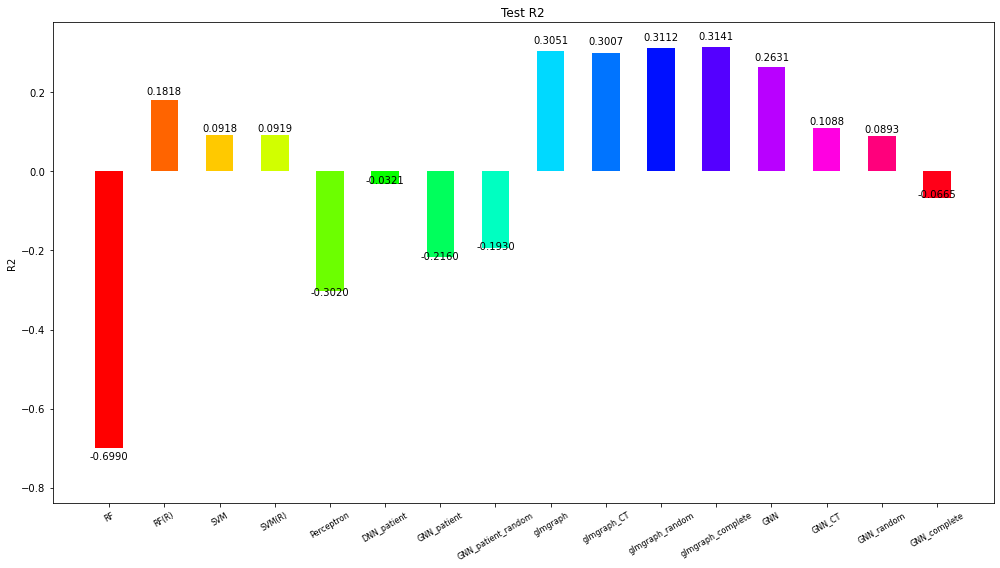

In [9]:
baccuracy = all_means["test_r2"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ymin = min(baccuracy) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("R2")
ax.set_title("Test R2")
autolabel(rectangles)
plt.tight_layout()
plt.show()

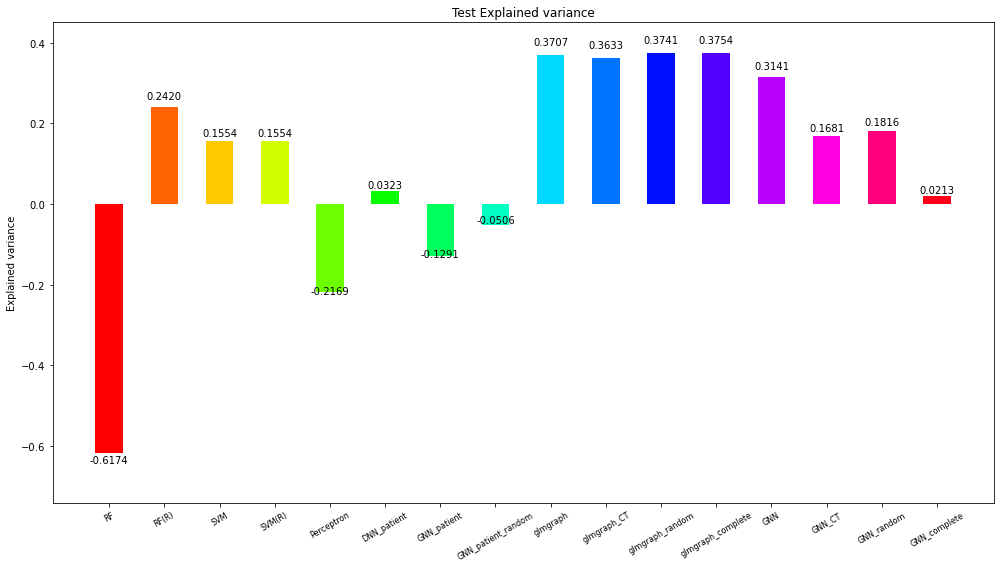

In [10]:
auc = all_means["test_explained_variance"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ymin = min(auc) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("Explained variance")
ax.set_title("Test Explained variance")
autolabel(rectangles)
plt.tight_layout()
plt.show()

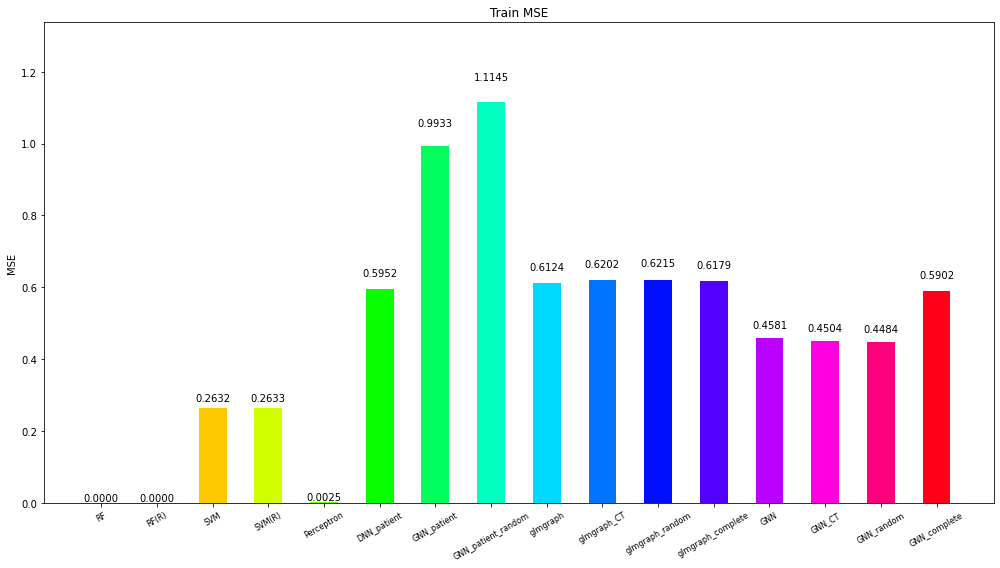

In [11]:
accuracy = all_means["train_mean_squared_error"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("MSE")
ax.set_title("Train MSE")
autolabel(rectangles)
plt.tight_layout()
plt.show()

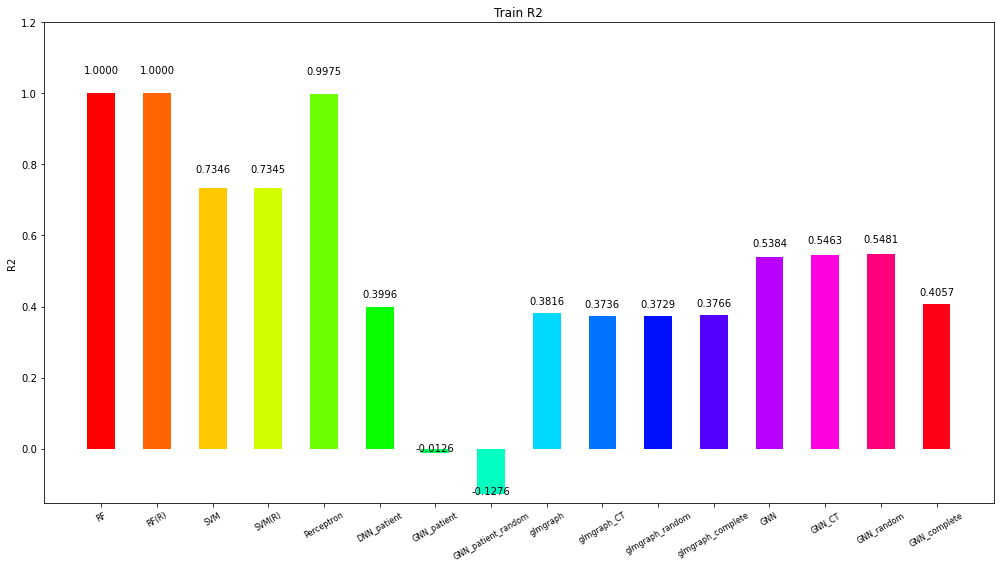

In [12]:
baccuracy = all_means["train_r2"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ymin = min(baccuracy) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("R2")
ax.set_title("Train R2")
autolabel(rectangles)
plt.tight_layout()
plt.show()

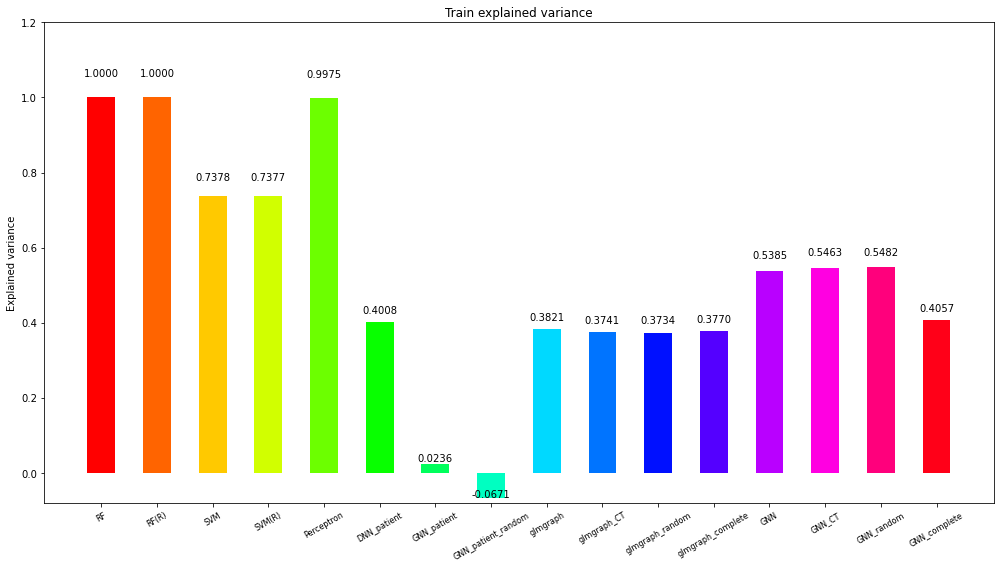

In [13]:
auc = all_means["train_explained_variance"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ymin = min(auc) * 1.2
ax.set_ylim((ymin, ymax))
ax.set_ylabel("Explained variance")
ax.set_title("Train explained variance")
autolabel(rectangles)
plt.tight_layout()
plt.show()

### Full distribution

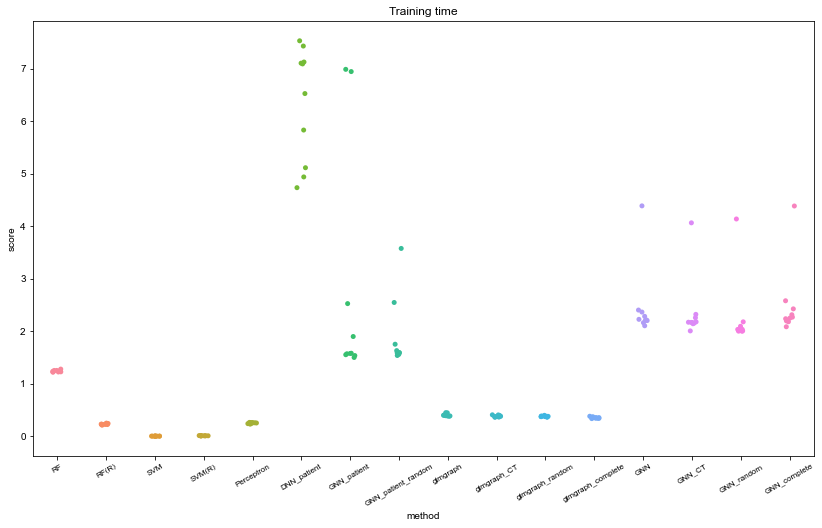

In [14]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["fit_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Training time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

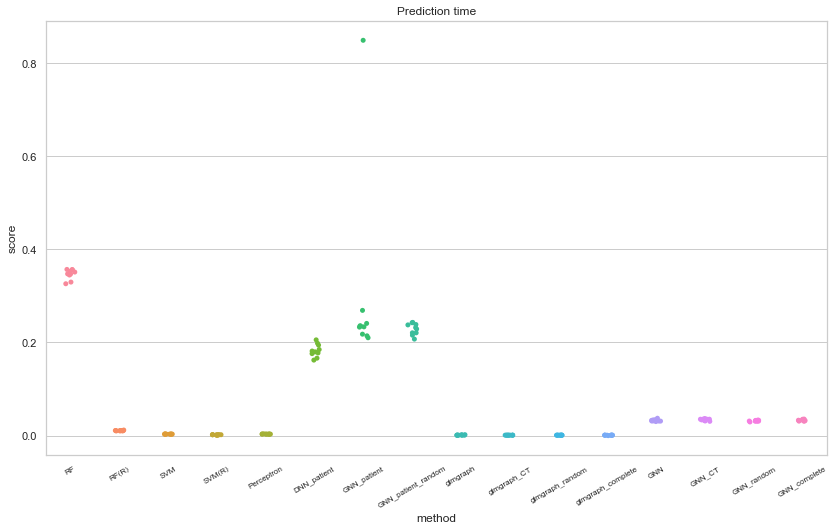

In [15]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["score_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Prediction time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

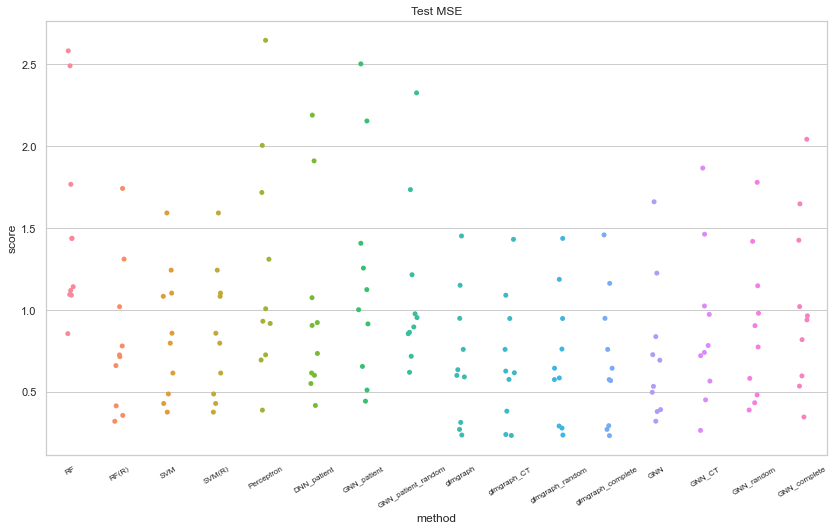

In [16]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_mean_squared_error"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test MSE")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

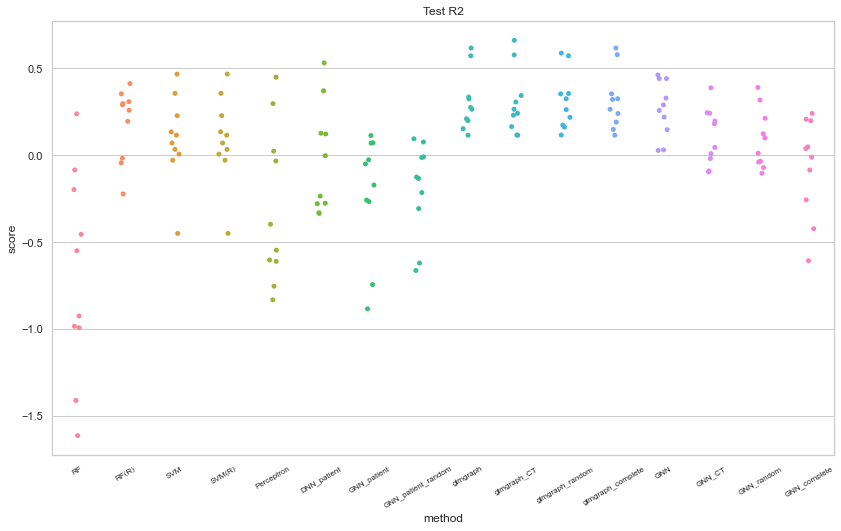

In [17]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_r2"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test R2")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

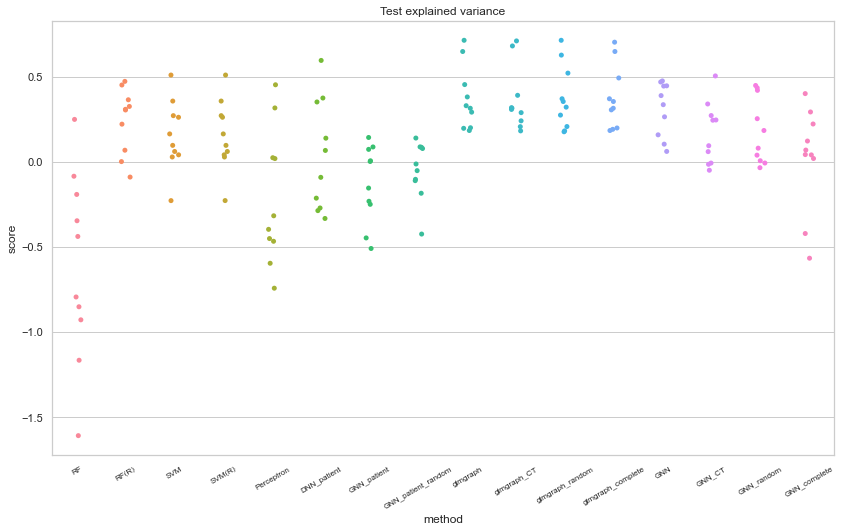

In [18]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_explained_variance"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test explained variance")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

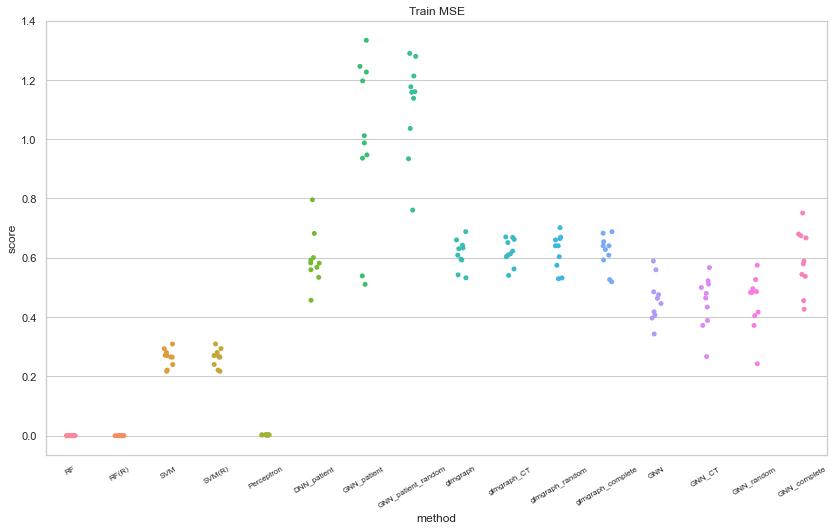

In [19]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_mean_squared_error"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train MSE")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

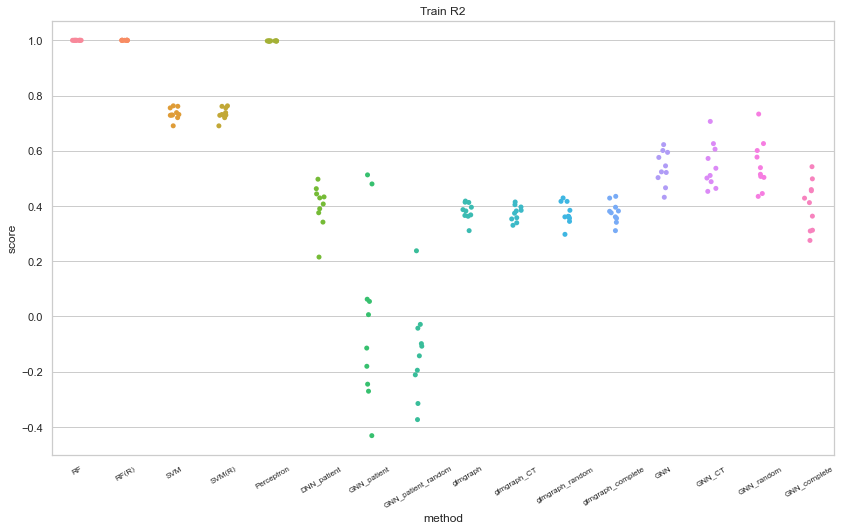

In [20]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_r2"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train R2")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

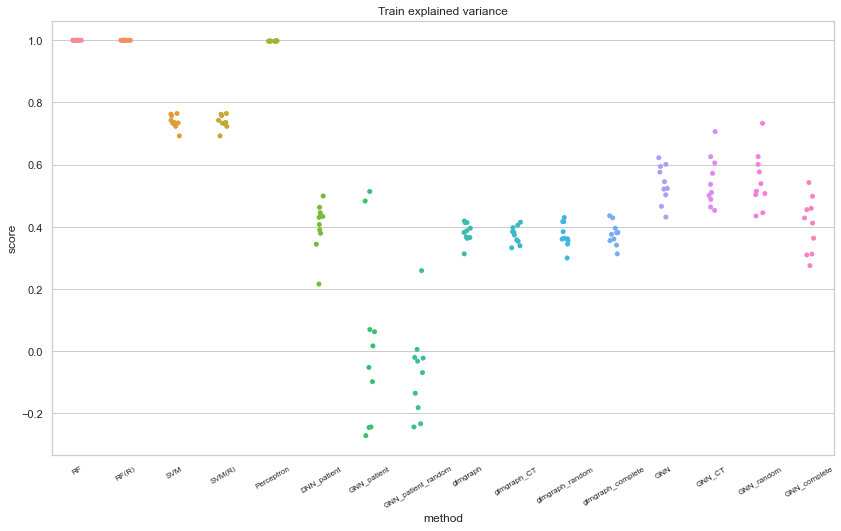

In [21]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["train_explained_variance"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train explained variance")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()